In [ ]:
import pandas as pd
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
df = pd.read_csv('/content/drive/My Drive/ecommerce.csv')

Mounted at /content/drive


In [ ]:
# Step 1: Data Cleaning and Transformation

# Removing duplicates (if any)
df.drop_duplicates(inplace=True)

In [ ]:
# Handling missing values
# Assuming 'total_order_amount' is a numeric column and we want to fill missing values with the mean
df['Total Purchase Amount'].fillna(df['Total Purchase Amount'].mean(), inplace=True)

In [ ]:
# Convert 'order_date' to datetime format
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

In [ ]:
from scipy.stats import zscore

# Assuming 'df' is your DataFrame and 'column_name' is the column for which you want to calculate the IQR
column_name = 'Total Purchase Amount'

# Calculate Z-scores for the specified column
z_scores = zscore(df[column_name])

# Set a threshold for identifying outliers (e.g., 3 standard deviations)
threshold = 3
outliers_mask = np.abs(z_scores) > threshold

# Identify outliers and non-outliers
outliers = df[outliers_mask]
non_outliers = df[~outliers_mask]

# Calculate the IQR for the non-outlier data
q1 = non_outliers[column_name].quantile(0.25)
q3 = non_outliers[column_name].quantile(0.75)
iqr = q3 - q1

print(f'Q1: {q1}')
print(f'Q3: {q3}')
print(f'IQR (without outliers): {iqr}')


Q1: 1477.0
Q3: 3974.0
IQR (without outliers): 2497.0


In [ ]:
# Example of removing outliers in 'total_order_amount' using Z-score
from scipy import stats
z_scores = np.abs(stats.zscore(df['Total Purchase Amount']))
df = df[(z_scores < 3)]  # Remove rows with outliers (consider adjusting the threshold as needed)

In [ ]:
# Transforming categorical columns into numerical representations (e.g., one-hot encoding)
# Assuming 'payment_method' is a categorical column
df = pd.get_dummies(df, columns=['Payment Method'], prefix='Payment Method')

In [ ]:
# Creating a new feature (e.g., 'total_items_purchased')
# You can combine information from multiple columns to create new features
df['Product Category'] = df['Quantity'] * df['Product Price']

In [ ]:
# Step 2: Calculation of RFM variables
# Recency
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])
df['recency'] = (pd.to_datetime('today') - df['Purchase Date']).dt.days

In [ ]:
# Frequency (Number of Orders per Customer)
df['frequency'] = df.groupby('Customer ID')['Purchase Date'].transform('count')

In [ ]:
# Monetary
df['monetary'] = df.groupby('Customer ID')['Total Purchase Amount'].transform('sum')

In [ ]:
# Step 3: Segmenting RFM variables into quantiles
df['recency_score'] = pd.qcut(df['recency'], q=[0, 0.25, 0.5, 0.75, 1], labels=[4, 3, 2, 1])
df['frequency_score'] = pd.qcut(df['frequency'], q=[0, 0.25, 0.5, 0.75, 1], labels=[1, 2, 3, 4])
df['monetary_score'] = pd.qcut(df['monetary'], q=[0, 0.25, 0.5, 0.75, 1], labels=[1, 2, 3, 4])

In [ ]:
# Step 5: Calculating Total Credit Score
df['total_credit_score'] = df['recency_score'].astype(int) + df['frequency_score'].astype(int) + \
                           df['monetary_score'].astype(int)

In [ ]:
# Final classification
def classify_customer(total_credit_score):
    if total_credit_score <= 3:
        return 'Worst customer'
    elif total_credit_score <= 6:
        return 'Average customer'
    elif total_credit_score <= 9:
        return 'Good customer'
    else:
        return 'Excellent customer'


In [ ]:
df['Category'] = df['total_credit_score'].apply(classify_customer)


In [ ]:
df.to_csv('output.csv', index=False)

In [ ]:
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Customer Name,Age,...,Payment Method_Crypto,Payment Method_PayPal,recency,frequency,monetary,recency_score,frequency_score,monetary_score,total_credit_score,Category
0,46251,2020-09-08 09:38:32,36,12,3,740,37,0.0,Christine Hernandez,37,...,0,0,1218,4,10184,1,1,1,3,Worst customer
1,46251,2022-03-05 12:56:35,1872,468,4,2739,37,0.0,Christine Hernandez,37,...,0,1,675,4,10184,3,1,1,5,Average customer
2,46251,2022-05-23 18:18:01,576,288,2,3196,37,0.0,Christine Hernandez,37,...,0,1,596,4,10184,3,1,1,5,Average customer
3,46251,2020-11-12 13:13:29,196,196,1,3509,37,0.0,Christine Hernandez,37,...,0,1,1153,4,10184,1,1,1,3,Worst customer
4,13593,2020-11-27 17:55:11,449,449,1,3452,49,0.0,James Grant,49,...,0,0,1138,5,12223,1,2,2,5,Average customer


In [ ]:
#Classification
import numpy as np
import pandas as pd
import math
import time
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import entropy
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, roc_auc_score
from sklearn.feature_selection import SelectKBest
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [ ]:
df.fillna(df.mean(), inplace=True)

<ipython-input-20-bf934754a5b1>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(df.mean(), inplace=True)
<ipython-input-20-bf934754a5b1>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [ ]:
# Splitting into test and train
X = df.drop(['Category', 'Purchase Date', 'Customer Name', 'Gender', 'Churn'], axis=1)
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

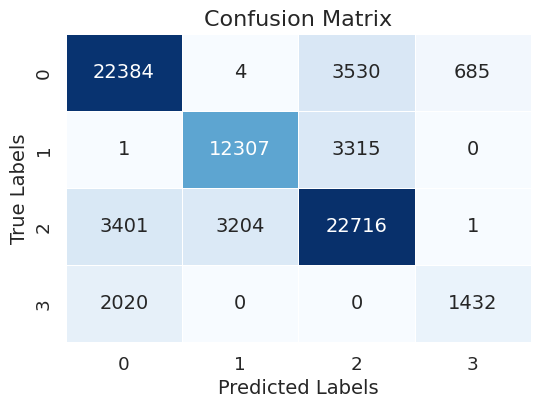


Classification Report:
                    precision    recall  f1-score   support

  Average customer       0.81      0.84      0.82     26603
Excellent customer       0.79      0.79      0.79     15623
     Good customer       0.77      0.77      0.77     29322
    Worst customer       0.68      0.41      0.51      3452

          accuracy                           0.78     75000
         macro avg       0.76      0.70      0.72     75000
      weighted avg       0.78      0.78      0.78     75000

Results:
        Metric     Value
0     Accuracy  0.784520
1    Precision  0.782327
2       Recall  0.784520
3     F1 Score  0.781834
4  Cohen Kappa  0.678391


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report
# Build and evaluate KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize Confusion Matrix
sns.set(font_scale=1.2)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=.5, cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

# Classification Report
class_report = classification_report(y_test, y_pred)

# Display the results
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Cohen Kappa'],
    'Value': [accuracy, precision, recall, f1, kappa]
})

print("\nClassification Report:")
print(class_report)

print("Results:")
print(results)

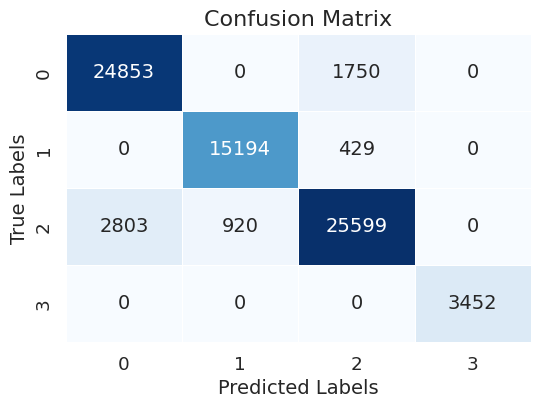


Classification Report:
                    precision    recall  f1-score   support

  Average customer       0.90      0.93      0.92     26603
Excellent customer       0.94      0.97      0.96     15623
     Good customer       0.92      0.87      0.90     29322
    Worst customer       1.00      1.00      1.00      3452

          accuracy                           0.92     75000
         macro avg       0.94      0.94      0.94     75000
      weighted avg       0.92      0.92      0.92     75000

Results:
        Metric     Value
0     Accuracy  0.921307
1    Precision  0.921489
2       Recall  0.921307
3     F1 Score  0.920971
4  Cohen Kappa  0.883852


In [ ]:
from sklearn.naive_bayes import GaussianNB
# Build and evaluate Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize Confusion Matrix
sns.set(font_scale=1.2)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=.5, cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

# Classification Report
class_report = classification_report(y_test, y_pred)

# Display the results
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Cohen Kappa'],
    'Value': [accuracy, precision, recall, f1, kappa]
})

print("\nClassification Report:")
print(class_report)

print("Results:")
print(results)


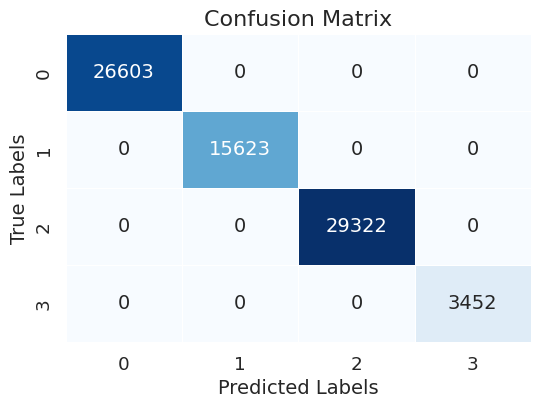


Classification Report:
                    precision    recall  f1-score   support

  Average customer       1.00      1.00      1.00     26603
Excellent customer       1.00      1.00      1.00     15623
     Good customer       1.00      1.00      1.00     29322
    Worst customer       1.00      1.00      1.00      3452

          accuracy                           1.00     75000
         macro avg       1.00      1.00      1.00     75000
      weighted avg       1.00      1.00      1.00     75000

Results:
        Metric  Value
0     Accuracy    1.0
1    Precision    1.0
2       Recall    1.0
3     F1 Score    1.0
4  Cohen Kappa    1.0


In [ ]:
# Build and evaluate Decision Tree model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize Confusion Matrix
sns.set(font_scale=1.2)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=.5, cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

# Classification Report
class_report = classification_report(y_test, y_pred)

# Display the results
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Cohen Kappa'],
    'Value': [accuracy, precision, recall, f1, kappa]
})

print("\nClassification Report:")
print(class_report)

print("Results:")
print(results)

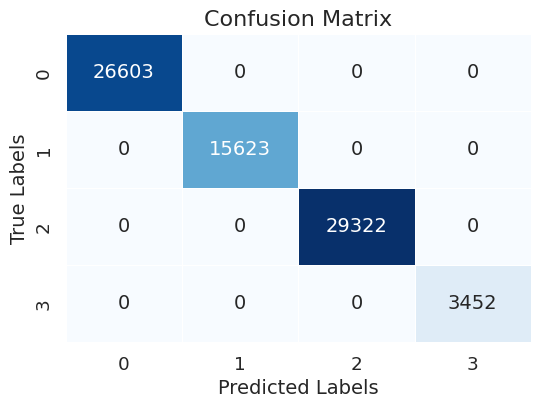


Classification Report:
                    precision    recall  f1-score   support

  Average customer       1.00      1.00      1.00     26603
Excellent customer       1.00      1.00      1.00     15623
     Good customer       1.00      1.00      1.00     29322
    Worst customer       1.00      1.00      1.00      3452

          accuracy                           1.00     75000
         macro avg       1.00      1.00      1.00     75000
      weighted avg       1.00      1.00      1.00     75000

Results:
        Metric  Value
0     Accuracy    1.0
1    Precision    1.0
2       Recall    1.0
3     F1 Score    1.0
4  Cohen Kappa    1.0


In [ ]:
# Build and evaluate Random Forest model
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize Confusion Matrix
sns.set(font_scale=1.2)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=.5, cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

# Classification Report
class_report = classification_report(y_test, y_pred)

# Display the results
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Cohen Kappa'],
    'Value': [accuracy, precision, recall, f1, kappa]
})

print("\nClassification Report:")
print(class_report)

print("Results:")
print(results)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


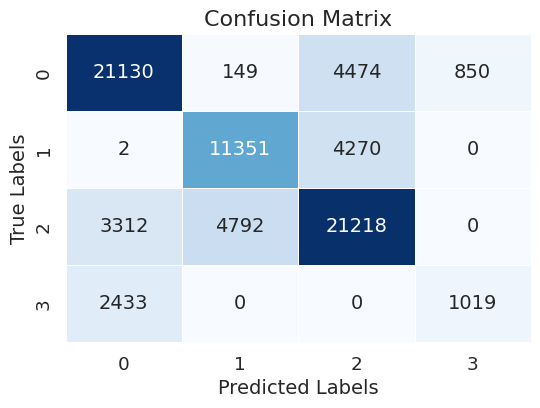


Classification Report:
                    precision    recall  f1-score   support

  Average customer       0.79      0.79      0.79     26603
Excellent customer       0.70      0.73      0.71     15623
     Good customer       0.71      0.72      0.72     29322
    Worst customer       0.55      0.30      0.38      3452

          accuracy                           0.73     75000
         macro avg       0.68      0.63      0.65     75000
      weighted avg       0.73      0.73      0.73     75000

Results:
        Metric     Value
0     Accuracy  0.729573
1    Precision  0.725951
2       Recall  0.729573
3     F1 Score  0.725945
4  Cohen Kappa  0.596562


In [ ]:
from sklearn.linear_model import LogisticRegression
# Build and evaluate Logistic Regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize Confusion Matrix
sns.set(font_scale=1.2)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=.5, cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

# Classification Report
class_report = classification_report(y_test, y_pred)

# Display the results
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Cohen Kappa'],
    'Value': [accuracy, precision, recall, f1, kappa]
})

print("\nClassification Report:")
print(class_report)

print("Results:")
print(results)

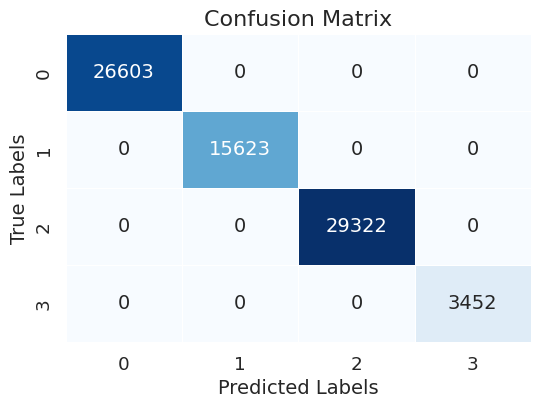


Confusion Matrix:
[[26603     0     0     0]
 [    0 15623     0     0]
 [    0     0 29322     0]
 [    0     0     0  3452]]

Classification Report:
                    precision    recall  f1-score   support

  Average customer       1.00      1.00      1.00     26603
Excellent customer       1.00      1.00      1.00     15623
     Good customer       1.00      1.00      1.00     29322
    Worst customer       1.00      1.00      1.00      3452

          accuracy                           1.00     75000
         macro avg       1.00      1.00      1.00     75000
      weighted avg       1.00      1.00      1.00     75000

Results:
        Metric  Value
0     Accuracy    1.0
1    Precision    1.0
2       Recall    1.0
3     F1 Score    1.0
4  Cohen Kappa    1.0


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming X_train, X_test, y_train, and y_test are already defined

# Normalize or scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and evaluate SVM model
svm = SVC(class_weight='balanced')  # Consider using class weights for imbalanced datasets
svm.fit(X_train_scaled, y_train)
y_pred = svm.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize Confusion Matrix
sns.set(font_scale=1.2)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=.5, cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

# Classification Report
class_report = classification_report(y_test, y_pred)

# Display the results
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Cohen Kappa'],
    'Value': [accuracy, precision, recall, f1, kappa]
})

print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)

print("Results:")
print(results)
